In [1]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline


C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\334813879.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
data= pd.read_excel(r"C:\Users\Amir Hbs\Desktop\Projects\Python\Milan Housing\milano_housing_Price_02_2_23.xlsx")
df=pd.DataFrame(data)
df

index rooms     m2 bathrooms floor condominium_expenses        date  \
0         0     3  140.0         2     4                  535  08/02/2023   
1         0     4  121.0         2     3                  200  17/02/2023   
2         0     2   55.0         1     4                  133  20/02/2023   
3         0     2   60.0         1     5                  333  11/01/2023   
4         0     4  220.0         3     4                  NaN  23/01/2023   
...     ...   ...    ...       ...   ...                  ...         ...   
2125      0     2   70.0         1    10                  135  26/02/2023   
2126      0     3   90.0         2     R                  183  19/02/2023   
2127      0     3  130.0         2     T                  200  26/02/2023   
2128      0     2   51.0         1     1                  NaN  26/02/2023   
2129      0     2   72.0         1   NaN                  250  26/02/2023   

     contract                                           typology total_floors  \
0        sale  apartment | entire property | stately property...     6 floors   
1        sale  apartment | entire property | stately property...     7 floors   
2        sale   attic | entire property | stately property class     4 floors   
3        sale     attic | bare ownership | medium property class     5 floors   
4        sale  apartment | entire property | stately property...     7 floors   
...       ...                                                ...          ...   
2125     sale  apartment | entire property | stately property...    11 floors   
2126     sale  apartment | entire property | medium property ...     7 floors   
2127     sale  apartment | entire property | stately property...     4 floors   
2128     sale  apartment | entire property | stately property...     5 floors   
2129     sale  apartment | entire property | medium property ...     5 floors   

      ... energy_certification co2_emissions  elevator  floor_level  \
0     ...                  NaN           NaN         1            4   
1     ...                  NaN           NaN         1            3   
2     ...                  NaN           NaN         1            4   
3     ...                  NaN           NaN         1            5   
4     ...                  NaN           NaN         1            4   
...   ...                  ...           ...       ...          ...   
2125  ...                  NaN           NaN         1            1   
2126  ...                  NaN           NaN         1            0   
2127  ...                  NaN           NaN         0            0   
2128  ...                  NaN           NaN         1            1   
2129  ...                  NaN           NaN         1            2   

     heating_centralized heating_radiator           heating_gas  \
0            centralized     to radiators       methane powered   
1             autonomous     to radiators           gas powered   
2             autonomous     to radiators           gas powered   
3            centralized     to radiators       methane powered   
4            centralized     to radiators       methane powered   
...                  ...              ...                   ...   
2125         centralized           by air       methane powered   
2126         centralized     to radiators       methane powered   
2127          autonomous           by air  powered by heat pump   
2128          autonomous     to radiators           gas powered   
2129         centralized     to radiators                   NaN   

     air_conditiong_centralized air_conditioning_heat  \
0                    autonomous              cold/hot   
1            system preparation                   NaN   
2                    autonomous              cold/hot   
3                    autonomous                  cold   
4                    autonomous              cold/hot   
...                         ...                   ...   
2125                 autonomous              cold/h

In [3]:
df.shape

(2130, 34)

In [4]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [5]:
check(df)

column   dtypes  nunique  sum_null
0                                       index    int64        1         0
1                                       rooms   object       29        14
2                                          m2  float64      276        17
3                                   bathrooms   object       29        25
4                                       floor   object       34       281
5                        condominium_expenses   object      239       460
6                                        date   object      134        14
7                                    contract   object        6        14
8                                    typology   object       44        14
9                                total_floors   object       25        47
10                               availability   object        1       441
11                             other_features   object     1796        36
12                                      price  float64      567       143
13                              year_of_build  float64      105       237
14                                  condition   object        4       113
15                           air_conditioning   object       13       519
16                          energy_efficiency   object      812       154
17                                       city   object        1        14
18                               neighborhood   object      145        14
19                                car_parking   object       40      1542
20                energy_performance_building   object        3      1897
21                              housing units  float64       55      2048
22                            start_end_works   object       82      2045
23                       current_building_use   object        4      2121
24                       energy_certification   object        3      1969
25                              co2_emissions   object        1      2129
26                                   elevator    int64        2         0
27                                floor_level   object       13       101
28                        heating_centralized   object        2        55
29                           heating_radiator   object        7       176
30                                heating_gas   object        9       378
31                 air_conditiong_centralized   object        5       519
32                      air_conditioning_heat   object        3       776
33  renewable_energy_performance_index_KWh/m2  float64       71      2013

In [6]:
temp = df.describe()
temp.style.background_gradient(cmap='Oranges')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   index                                      2130 non-null   int64  
 1   rooms                                      2116 non-null   object 
 2   m2                                         2113 non-null   float64
 3   bathrooms                                  2105 non-null   object 
 4   floor                                      1849 non-null   object 
 5   condominium_expenses                       1670 non-null   object 
 6   date                                       2116 non-null   object 
 7   contract                                   2116 non-null   object 
 8   typology                                   2116 non-null   object 
 9   total_floors                               2083 non-null   object 
 10  availability            

In [8]:
"""
In the first step the duplicate values will be removed from dataset.
"""

df = df.drop_duplicates()

In [9]:
# looking at the data frame info, we can see that there were 28 duplicate rows in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2129
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   index                                      2112 non-null   int64  
 1   rooms                                      2111 non-null   object 
 2   m2                                         2108 non-null   float64
 3   bathrooms                                  2100 non-null   object 
 4   floor                                      1845 non-null   object 
 5   condominium_expenses                       1667 non-null   object 
 6   date                                       2111 non-null   object 
 7   contract                                   2111 non-null   object 
 8   typology                                   2111 non-null   object 
 9   total_floors                               2078 non-null   object 
 10  availability            

In [10]:
df.head()

index rooms     m2 bathrooms floor condominium_expenses        date  \
0      0     3  140.0         2     4                  535  08/02/2023   
1      0     4  121.0         2     3                  200  17/02/2023   
2      0     2   55.0         1     4                  133  20/02/2023   
3      0     2   60.0         1     5                  333  11/01/2023   
4      0     4  220.0         3     4                  NaN  23/01/2023   

  contract                                           typology total_floors  \
0     sale  apartment | entire property | stately property...     6 floors   
1     sale  apartment | entire property | stately property...     7 floors   
2     sale   attic | entire property | stately property class     4 floors   
3     sale     attic | bare ownership | medium property class     5 floors   
4     sale  apartment | entire property | stately property...     7 floors   

   ... energy_certification co2_emissions  elevator  floor_level  \
0  ...                  NaN           NaN         1            4   
1  ...                  NaN           NaN         1            3   
2  ...                  NaN           NaN         1            4   
3  ...                  NaN           NaN         1            5   
4  ...                  NaN           NaN         1            4   

  heating_centralized heating_radiator      heating_gas  \
0         centralized     to radiators  methane powered   
1          autonomous     to radiators      gas powered   
2          autonomous     to radiators      gas powered   
3         centralized     to radiators  methane powered   
4         centralized     to radiators  methane powered   

  air_conditiong_centralized air_conditioning_heat  \
0                 autonomous              cold/hot   
1         system preparation                   NaN   
2                 autonomous              cold/hot   
3                 autonomous                  cold   
4                 autonomous              cold/hot   

  renewable_energy_performance_index_KWh/m2  
0                                       NaN  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                     351.0  

[5 rows x 34 columns]

In [11]:
# in the next step the data types will be converted to numeric types.

In [12]:
def numeric_converter(df, column):
    """
   A new function has been developed to facilitate the conversion of non-numeric values into their numeric counterparts. 
   This function takes two parameters: the data frame and the column to be converted.
   The result of this conversion is a column with numeric values
    """
    return pd.to_numeric(df[column].astype(str), errors='coerce')

In [13]:
df['rooms']                = numeric_converter(df, "rooms")
df['m2']                   = numeric_converter(df, "m2")
df['bathrooms']            = numeric_converter(df, "bathrooms")
df['condominium_expenses'] = numeric_converter(df, "condominium_expenses")

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\3411664581.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\3411664581.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\3411664581.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2129
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   index                                      2112 non-null   int64  
 1   rooms                                      1915 non-null   float64
 2   m2                                         2108 non-null   float64
 3   bathrooms                                  2027 non-null   float64
 4   floor                                      1845 non-null   object 
 5   condominium_expenses                       1661 non-null   float64
 6   date                                       2111 non-null   object 
 7   contract                                   2111 non-null   object 
 8   typology                                   2111 non-null   object 
 9   total_floors                               2078 non-null   object 
 10  availability            

In [15]:
# The subsequent step involves cleaning the columns containing redundant values

In [16]:
df['energy_efficiency']

0       d248.59 kwh/m² year
1       e≥ 3,51 kwh/m² year
2       e183.89 kwh/m² year
3        f138.8 kwh/m² year
4       g≥ 3,51 kwh/m² year
               ...         
2125    b≥ 3,51 kwh/m² year
2126       f174 kwh/m² year
2127     f≥ 175 kwh/m² year
2128    f193.44 kwh/m² year
2129    f284.99 kwh/m² year
Name: energy_efficiency, Length: 2112, dtype: object

In [17]:
df['energy_efficiency']=df['energy_efficiency'].str.extract(r'(\d+[\.,]?\d*)')
df['energy_efficiency']=df['energy_efficiency'].str.replace(',','.').astype(float)

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\3340573297.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\3340573297.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
df['energy_efficiency']

0       248.59
1         3.51
2       183.89
3       138.80
4         3.51
         ...  
2125      3.51
2126    174.00
2127    175.00
2128    193.44
2129    284.99
Name: energy_efficiency, Length: 2112, dtype: float64

In [19]:
df['floor']

0         4
1         3
2         4
3         5
4         4
       ... 
2125     10
2126      R
2127      T
2128      1
2129    NaN
Name: floor, Length: 2112, dtype: object

In [20]:
 """
 The dataframe has some codes for Basement(seminterrato) ,
 Grand floor (piano terra) and low-ceilinged intermediate floor(Mezzanine)
 For the porpuse of analysis of this column it is needed to change this codes to numeric values.
 """
floor_numeric_codes = {
    'S': -1,  # Basement
    'S-S': -1,
    'S-T' :-1,
    
    'T': 0,   # Ground floor
    'T-R': 0,
    'R': 0,
    
    'M': 0.5  # Mezzanine
}

In [21]:
df['floor']=pd.to_numeric(
    df['floor'].map(floor_numeric_codes).fillna(df['floor']),
    errors = 'coerce')

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\3111595199.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df['floor']

0        4.0
1        3.0
2        4.0
3        5.0
4        4.0
        ... 
2125    10.0
2126     0.0
2127     0.0
2128     1.0
2129     NaN
Name: floor, Length: 2112, dtype: float64

In [23]:
df['condition']

0       very good / refurbished
1       very good / refurbished
2              good / habitable
3       very good / refurbished
4              good / habitable
                 ...           
2125    very good / refurbished
2126    very good / refurbished
2127    very good / refurbished
2128    very good / refurbished
2129         to be restructured
Name: condition, Length: 2112, dtype: object

In [24]:
"""
To enhance usability, the condition column requires encoding for improved readability. The following mappings are applied:

'new / under construction' is coded as 'New'
'very good / refurbished' is coded as 'G+'
'good / habitable' is coded as 'G'
'to be restructured' is coded as 'Rest'
"""


condition_categories = ['new / under construction', 'very good / refurbished', 'good / habitable', 'to be restructured']
condition_codes = ['NEW', 'G+', 'G', 'Rest']
ordinal_dtype = pd.CategoricalDtype(categories = condition_categories, ordered = True)

In [25]:
df['condition'] = pd.Categorical(df['condition'],categories = condition_categories,
                                 ordered = True).rename_categories(condition_codes)

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\1352879280.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
df['condition']

0         G+
1         G+
2          G
3         G+
4          G
        ... 
2125      G+
2126      G+
2127      G+
2128      G+
2129    Rest
Name: condition, Length: 2112, dtype: category
Categories (4, object): ['NEW' < 'G+' < 'G' < 'Rest']

In [27]:
""" The Columns related to features of the houses will convert to boolean type.
in this method empty rows become False and Value columns become True.""" 

' The Columns related to features of the houses will convert to boolean type.\nin this method empty rows become False and Value columns become True.'

In [28]:
df['air_conditioning']

0       autonomous, cold/heat
1          system preparation
2       autonomous, cold/heat
3            autonomous, cold
4       autonomous, cold/heat
                ...          
2125    autonomous, cold/heat
2126         autonomous, cold
2127    autonomous, cold/heat
2128       system preparation
2129       system preparation
Name: air_conditioning, Length: 2112, dtype: object

In [29]:
df['air_conditioning'] = df['air_conditioning'].fillna(False).astype(bool)

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\4274699150.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
df['air_conditioning']

0       True
1       True
2       True
3       True
4       True
        ... 
2125    True
2126    True
2127    True
2128    True
2129    True
Name: air_conditioning, Length: 2112, dtype: bool

In [31]:
df['availability']

0       libero
1       libero
2       libero
3       libero
4       libero
         ...  
2125    libero
2126    libero
2127    libero
2128    libero
2129    libero
Name: availability, Length: 2112, dtype: object

In [32]:
df['availability']= df['availability'].fillna(False).astype(bool)

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\170058577.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df['availability']

0       True
1       True
2       True
3       True
4       True
        ... 
2125    True
2126    True
2127    True
2128    True
2129    True
Name: availability, Length: 2112, dtype: bool

In [34]:
df['car_parking']

0                   NaN
1                   NaN
2       1 in garage/box
3                   NaN
4       1 in garage/box
             ...       
2125                NaN
2126                NaN
2127                NaN
2128                NaN
2129    1 in garage/box
Name: car_parking, Length: 2112, dtype: object

In [35]:
df['car_parking']= df['car_parking'].fillna(False).astype(bool)

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\560447760.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df['car_parking']

0       False
1       False
2        True
3       False
4        True
        ...  
2125    False
2126    False
2127    False
2128    False
2129     True
Name: car_parking, Length: 2112, dtype: bool

In [37]:
df['elevator'] 

0       1
1       1
2       1
3       1
4       1
       ..
2125    1
2126    1
2127    0
2128    1
2129    1
Name: elevator, Length: 2112, dtype: int64

In [38]:
df['elevator'] = df['elevator'].fillna(False).astype(bool)

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\3873736539.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
df['elevator'] 

0        True
1        True
2        True
3        True
4        True
        ...  
2125     True
2126     True
2127    False
2128     True
2129     True
Name: elevator, Length: 2112, dtype: bool

In [40]:
check(df)

column    dtypes  nunique  sum_null
0                                       index     int64        1         0
1                                       rooms   float64        5       197
2                                          m2   float64      276         4
3                                   bathrooms   float64       26        85
4                                       floor   float64       19       306
5                        condominium_expenses   float64      231       451
6                                        date    object      134         1
7                                    contract    object        6         1
8                                    typology    object       44         1
9                                total_floors    object       25        34
10                               availability      bool        2         0
11                             other_features    object     1796        23
12                                      price   float64      567       130
13                              year_of_build   float64      105       223
14                                  condition  category        4       100
15                           air_conditioning      bool        2         0
16                          energy_efficiency   float64      739       184
17                                       city    object        1         1
18                               neighborhood    object      145         1
19                                car_parking      bool        2         0
20                energy_performance_building    object        3      1880
21                              housing units   float64       55      2030
22                            start_end_works    object       82      2027
23                       current_building_use    object        4      2103
24                       energy_certification    object        3      1951
25                              co2_emissions    object        1      2111
26                                   elevator      bool        2         0
27                                floor_level    object       13        88
28                        heating_centralized    object        2        42
29                           heating_radiator    object        7       161
30                                heating_gas    object        9       363
31                 air_conditiong_centralized    object        5       505
32                      air_conditioning_heat    object        3       762
33  renewable_energy_performance_index_KWh/m2   float64       71      1995

In [41]:
df['heating_centralized']= df['heating_centralized'].fillna(False).astype(bool)
df['heating_radiator']= df['heating_radiator'].fillna(False).astype(bool)
df['heating_gas']= df['heating_gas'].fillna(False).astype(bool)
df['air_conditiong_centralized']= df['air_conditiong_centralized'].fillna(False).astype(bool)
df['air_conditioning_heat']= df['air_conditioning_heat'].fillna(False).astype(bool)
df['floor_level']= df['floor_level'].fillna(False).astype(bool)
df['energy_certification']= df['energy_certification'].fillna(False).astype(bool)

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\2529064708.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\2529064708.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Amir Hbs\AppData\Local\Temp\ipykernel_11072\2529064708.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [42]:
check(df)

column    dtypes  nunique  sum_null
0                                       index     int64        1         0
1                                       rooms   float64        5       197
2                                          m2   float64      276         4
3                                   bathrooms   float64       26        85
4                                       floor   float64       19       306
5                        condominium_expenses   float64      231       451
6                                        date    object      134         1
7                                    contract    object        6         1
8                                    typology    object       44         1
9                                total_floors    object       25        34
10                               availability      bool        2         0
11                             other_features    object     1796        23
12                                      price   float64      567       130
13                              year_of_build   float64      105       223
14                                  condition  category        4       100
15                           air_conditioning      bool        2         0
16                          energy_efficiency   float64      739       184
17                                       city    object        1         1
18                               neighborhood    object      145         1
19                                car_parking      bool        2         0
20                energy_performance_building    object        3      1880
21                              housing units   float64       55      2030
22                            start_end_works    object       82      2027
23                       current_building_use    object        4      2103
24                       energy_certification      bool        2         0
25                              co2_emissions    object        1      2111
26                                   elevator      bool        2         0
27                                floor_level      bool        2         0
28                        heating_centralized      bool        2         0
29                           heating_radiator      bool        2         0
30                                heating_gas      bool        2         0
31                 air_conditiong_centralized      bool        2         0
32                      air_conditioning_heat      bool        2         0
33  renewable_energy_performance_index_KWh/m2   float64       71      1995

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 0 to 2129
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   index                                      2112 non-null   int64   
 1   rooms                                      1915 non-null   float64 
 2   m2                                         2108 non-null   float64 
 3   bathrooms                                  2027 non-null   float64 
 4   floor                                      1806 non-null   float64 
 5   condominium_expenses                       1661 non-null   float64 
 6   date                                       2111 non-null   object  
 7   contract                                   2111 non-null   object  
 8   typology                                   2111 non-null   object  
 9   total_floors                               2078 non-null   object  
 10  availability

In [44]:
"""
To simplify the DataFrame and enhance clarity, certain columns will be removed due to having a limited number of rows.
The affected columns and their respective row counts are as follows:

'co2_emissions': 1 row
'current_building_use': 9 rows
'renewable_energy_performance_index_KWh/m2': 71 rows
These columns will be dropped from the DataFrame to streamline the data representation.
"""

columns_to_drop = ['co2_emissions', 'current_building_use', 'renewable_energy_performance_index_KWh/m2',
                   'housing units','start_end_works']
df = df.drop(columns_to_drop, axis=1)

In [45]:
df.dropna(subset=['price'], inplace=True)

In [46]:
df.dropna(subset=['m2'], inplace=True)

In [47]:
df.dropna(subset=['other_features'], inplace=True)

In [48]:
mode_value = df['rooms'].mode()[0]
df['rooms'].fillna(mode_value, inplace=True)

In [49]:
mode_value = df['bathrooms'].mode()[0]
df['bathrooms'].fillna(mode_value, inplace=True)

In [50]:
mode_value = df['condition'].mode()[0]
df['condition'].fillna(mode_value, inplace=True)

In [51]:
mode_value = df['total_floors'].mode()[0]
df['total_floors'].fillna(mode_value, inplace=True)

In [52]:
mode_value = df['energy_efficiency'].mean()
df['energy_efficiency'].fillna(mode_value, inplace=True)

In [53]:
mode_value = df['condominium_expenses'].mean()
df['condominium_expenses'].fillna(mode_value, inplace=True)

In [54]:
mode_value = df['year_of_build'].mean()
df['year_of_build'].fillna(mode_value, inplace=True)

In [55]:
mode_value = df['floor'].mode()[0]
df['floor'].fillna(mode_value, inplace=True)

In [56]:
mode_value = df['energy_performance_building'].mode()[0]
df['energy_performance_building'].fillna(mode_value, inplace=True)

In [57]:
df.dropna(subset=['condition'], inplace=True)

In [58]:
check(df)

column    dtypes  nunique  sum_null
0                         index     int64        1         0
1                         rooms   float64        5         0
2                            m2   float64      265         0
3                     bathrooms   float64        5         0
4                         floor   float64       19         0
5          condominium_expenses   float64      229         0
6                          date    object      129         0
7                      contract    object        6         0
8                      typology    object       42         0
9                  total_floors    object       25         0
10                 availability      bool        2         0
11               other_features    object     1738         0
12                        price   float64      565         0
13                year_of_build   float64      105         0
14                    condition  category        4         0
15             air_conditioning      bool        2         0
16            energy_efficiency   float64      722         0
17                         city    object        1         0
18                 neighborhood    object      143         0
19                  car_parking      bool        2         0
20  energy_performance_building    object        3         0
21         energy_certification      bool        2         0
22                     elevator      bool        2         0
23                  floor_level      bool        2         0
24          heating_centralized      bool        2         0
25             heating_radiator      bool        2         0
26                  heating_gas      bool        2         0
27   air_conditiong_centralized      bool        2         0
28        air_conditioning_heat      bool        2         0

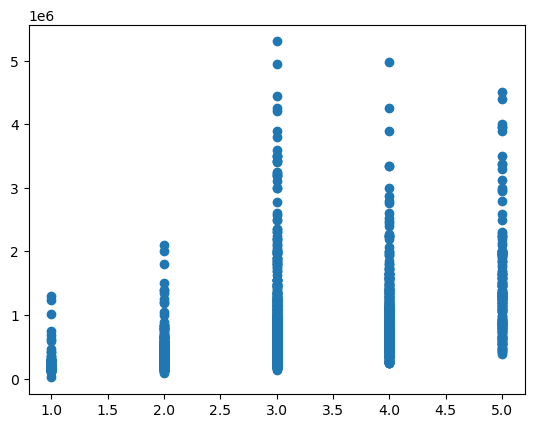

In [59]:
plt.scatter(df.rooms,df.price)

In [60]:
df.columns

Index(['index', 'rooms', 'm2', 'bathrooms', 'floor', 'condominium_expenses',
       'date', 'contract', 'typology', 'total_floors', 'availability',
       'other_features', 'price', 'year_of_build', 'condition',
       'air_conditioning', 'energy_efficiency', 'city', 'neighborhood',
       'car_parking', 'energy_performance_building', 'energy_certification',
       'elevator', 'floor_level', 'heating_centralized', 'heating_radiator',
       'heating_gas', 'air_conditiong_centralized', 'air_conditioning_heat'],
      dtype='object')

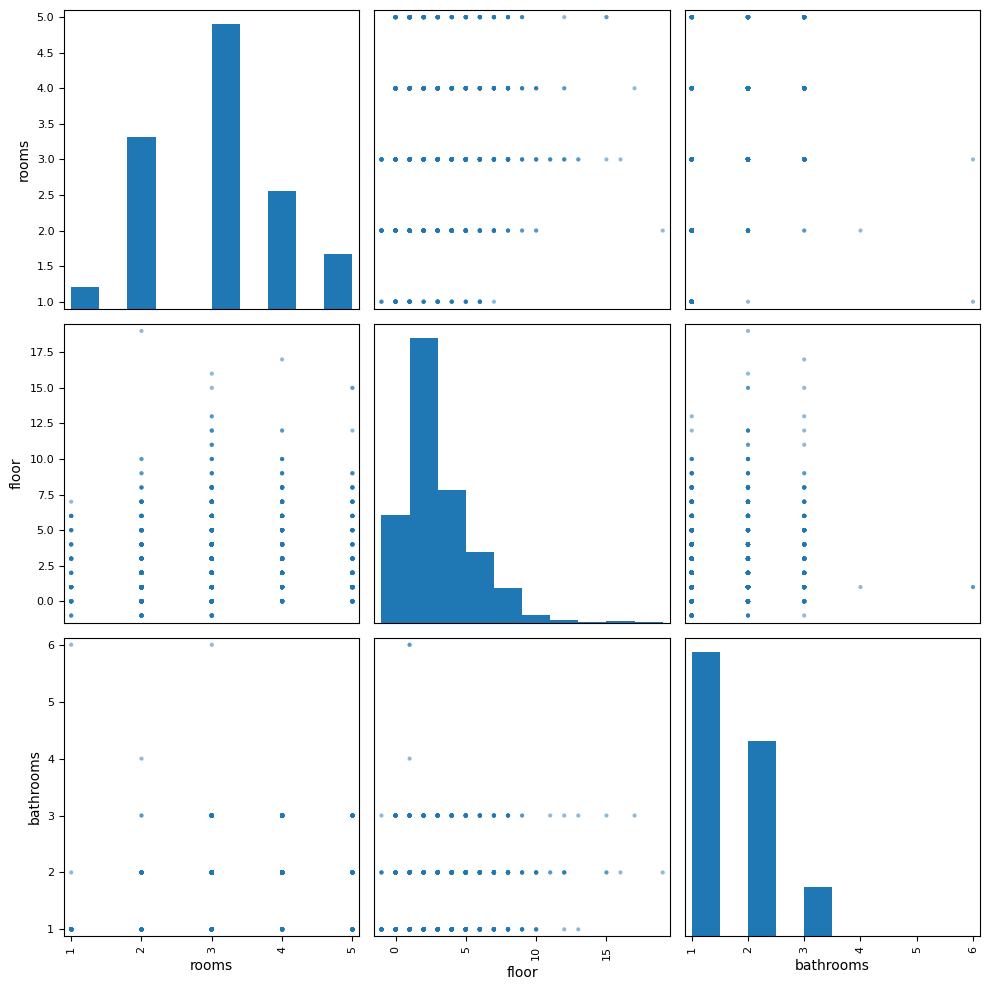

In [61]:
#To analyze the outliers from the dataframe the scatter matrix will be used
columns_to_plot = ['rooms','floor', 'bathrooms']

pd.plotting.scatter_matrix(df[columns_to_plot], figsize=(10, 10))

plt.tight_layout()
plt.show()

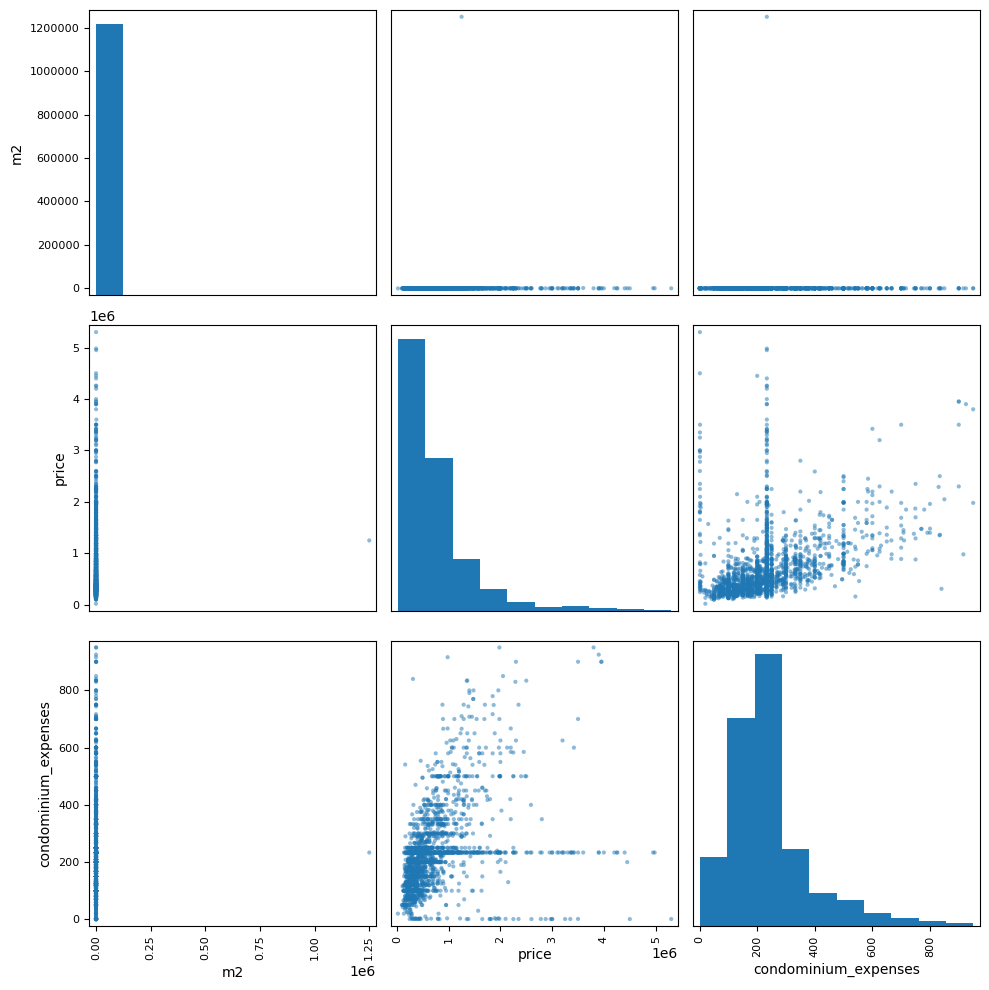

In [62]:
#To analyze the outliers from the dataframe the scatter matrix will be used
columns_to_plot = ['m2','price', 'condominium_expenses']

pd.plotting.scatter_matrix(df[columns_to_plot], figsize=(10, 10))

plt.tight_layout()
plt.show()

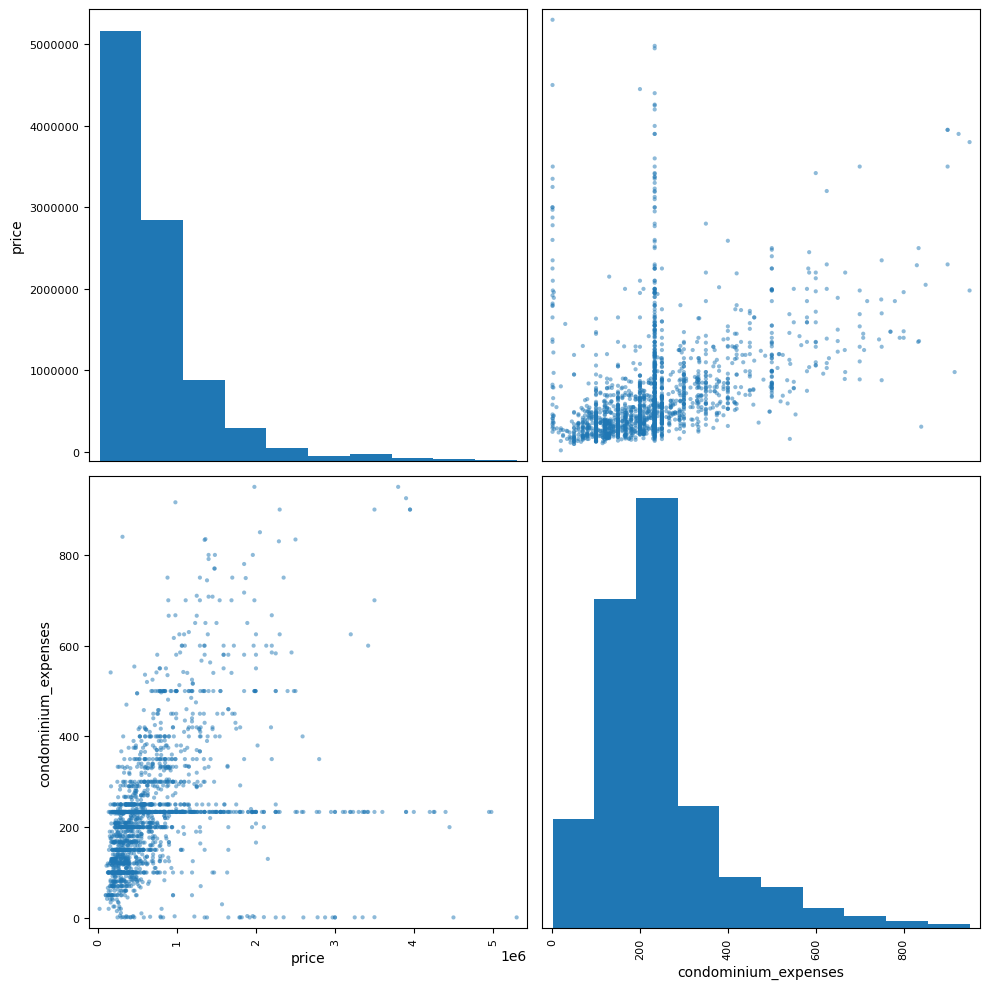

In [63]:
columns_to_plot = ['price', 'condominium_expenses']

pd.plotting.scatter_matrix(df[columns_to_plot], figsize=(10, 10))

plt.tight_layout()
plt.show()

In [64]:
df.describe()

index        rooms            m2    bathrooms        floor  \
count  1976.0  1976.000000  1.976000e+03  1976.000000  1976.000000   
mean      0.0     3.018725  7.494747e+02     1.562753     2.494939   
std       0.0     0.958455  2.811757e+04     0.675884     2.444726   
min       0.0     1.000000  1.000000e+00     1.000000    -1.000000   
25%       0.0     2.000000  7.075000e+01     1.000000     1.000000   
50%       0.0     3.000000  1.000000e+02     1.000000     2.000000   
75%       0.0     4.000000  1.400000e+02     2.000000     4.000000   
max       0.0     5.000000  1.250000e+06     6.000000    19.000000   

       condominium_expenses         price  year_of_build  energy_efficiency  
count           1976.000000  1.976000e+03    1976.000000        1976.000000  
mean             233.520433  7.270203e+05    1961.722252         149.786935  
std              144.857352  6.506547e+05      49.964902          84.757945  
min                1.000000  2.000000e+04    1100.000000           1.000000  
25%              140.000000  3.290000e+05    1940.000000         123.505000  
50%              230.000000  5.200000e+05    1960.000000         175.000000  
75%              260.000000  8.615000e+05    1974.000000         175.000000  
max              950.000000  5.300000e+06    2025.000000        1167.100000

In [65]:

"""
Compute the z-scores for each column in the given DataFrame by utilizing the concept of standardization.
Z-scores provide a measure of how many standard deviations an individual data point is away from the mean of its respective column.
This process allows for a standardized representation of the data,
enabling effective comparison and identification of outliers across different columns.
"""
numeric_columns = df.select_dtypes(include=['int', 'float'])
z_scores = np.abs((numeric_columns - numeric_columns.mean()) / numeric_columns.std())

threshold = 3
outlier_mask = z_scores > threshold

df_cl = df[~outlier_mask.any(axis=1)]

df_cl

index  rooms     m2  bathrooms  floor  condominium_expenses        date  \
0         0    3.0  140.0        2.0    4.0            535.000000  08/02/2023   
1         0    4.0  121.0        2.0    3.0            200.000000  17/02/2023   
2         0    2.0   55.0        1.0    4.0            133.000000  20/02/2023   
3         0    2.0   60.0        1.0    5.0            333.000000  11/01/2023   
4         0    4.0  220.0        3.0    4.0            233.520433  23/01/2023   
...     ...    ...    ...        ...    ...                   ...         ...   
2124      0    2.0   51.0        1.0    2.0            100.000000  26/02/2023   
2126      0    3.0   90.0        2.0    0.0            183.000000  19/02/2023   
2127      0    3.0  130.0        2.0    0.0            200.000000  26/02/2023   
2128      0    2.0   51.0        1.0    1.0            233.520433  26/02/2023   
2129      0    2.0   72.0        1.0    1.0            250.000000  26/02/2023   

     contract                                           typology total_floors  \
0        sale  apartment | entire property | stately property...     6 floors   
1        sale  apartment | entire property | stately property...     7 floors   
2        sale   attic | entire property | stately property class     4 floors   
3        sale     attic | bare ownership | medium property class     5 floors   
4        sale  apartment | entire property | stately property...     7 floors   
...       ...                                                ...          ...   
2124     sale  apartment | entire property | stately property...     8 floors   
2126     sale  apartment | entire property | medium property ...     7 floors   
2127     sale  apartment | entire property | stately property...     4 floors   
2128     sale  apartment | entire property | stately property...     5 floors   
2129     sale  apartment | entire property | medium property ...     5 floors   

      ...  car_parking energy_performance_building  energy_certification  \
0     ...        False               winter summer                 False   
1     ...        False               winter summer                 False   
2     ...         True               winter summer                 False   
3     ...        False               winter summer                 False   
4     ...         True               winter summer                 False   
...   ...          ...                         ...                   ...   
2124  ...        False               winter summer                 False   
2126  ...        False               winter summer                 False   
2127  ...        False               winter summer                 False   
2128  ...        False               winter summer                 False   
2129  ...         True               winter summer                 False   

      elevator floor_level  heating_centralized  heating_radiator heating_gas  \
0         True        True                 True              True        True   
1         True        True                 True              True        True   
2         True        True                 True              True        True   
3         True        True                 True              True        True   
4         True        True                 True              True        True   
...        ...         ...                  ...               ...         ...   
2124      True        True                 True              True        True   
2126      True        True                 True              True        True   
2127     False        True                 True              True        True   
2128      True        True                 True              True        True   
2129      True        True                 True              True       False   

     air_conditiong_centralized  air_conditioning_heat  
0                          True                   True  
1                          True                  False  
2  

In [66]:
df_cl.describe()

index        rooms           m2    bathrooms        floor  \
count  1835.0  1835.000000  1835.000000  1835.000000  1835.000000   
mean      0.0     2.977657   107.965123     1.525886     2.338965   
std       0.0     0.941612    56.420729     0.635002     2.141805   
min       0.0     1.000000     1.000000     1.000000    -1.000000   
25%       0.0     2.000000    70.000000     1.000000     1.000000   
50%       0.0     3.000000    96.000000     1.000000     2.000000   
75%       0.0     4.000000   130.000000     2.000000     4.000000   
max       0.0     5.000000   702.000000     3.000000     9.000000   

       condominium_expenses         price  year_of_build  energy_efficiency  
count           1835.000000  1.835000e+03    1835.000000        1835.000000  
mean             223.624250  6.339990e+05    1964.360492         146.856449  
std              122.146774  4.494217e+05      33.998288          72.769487  
min                1.000000  2.000000e+04    1850.000000           1.000000  
25%              135.000000  3.200000e+05    1950.000000         123.885000  
50%              220.000000  4.950000e+05    1960.000000         175.000000  
75%              250.000000  7.980000e+05    1971.500000         175.000000  
max              667.000000  2.600000e+06    2025.000000         400.110000

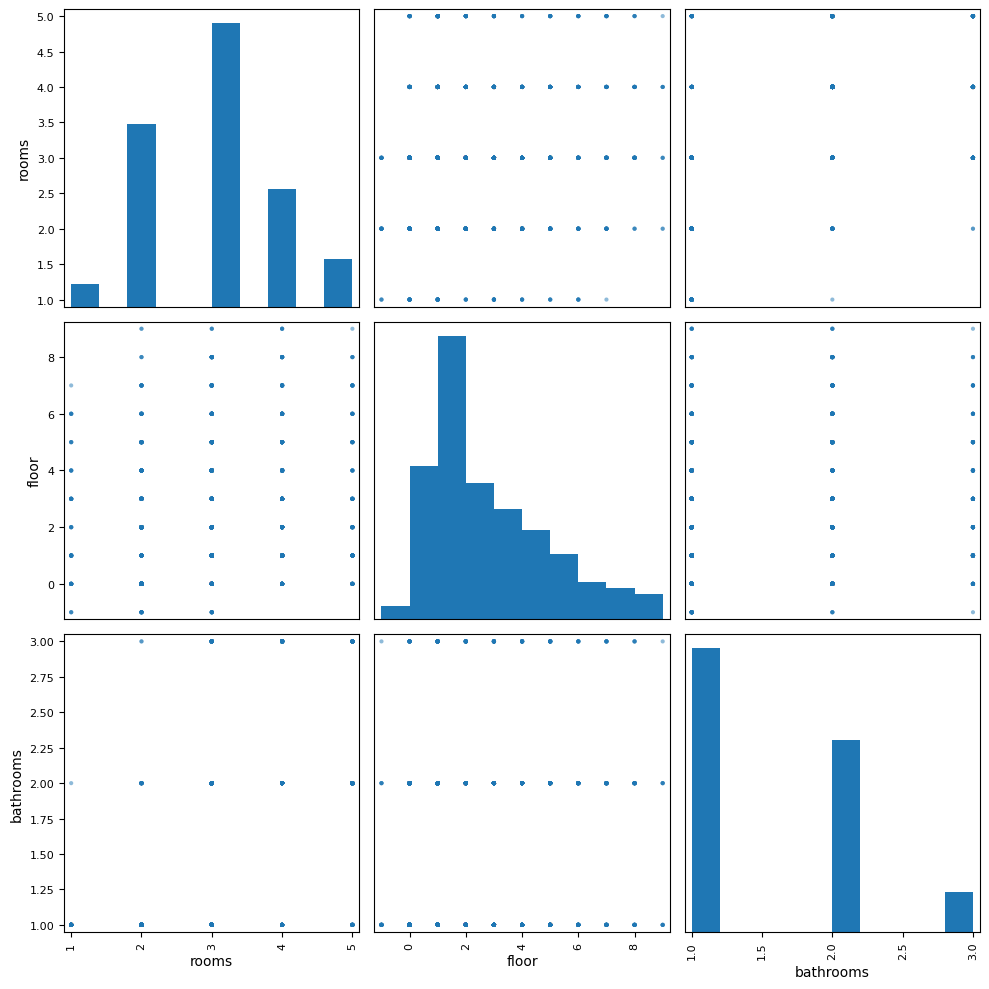

In [67]:
columns_to_plot = ['rooms','floor', 'bathrooms']

pd.plotting.scatter_matrix(df_cl[columns_to_plot], figsize=(10, 10))

plt.tight_layout()
plt.show()

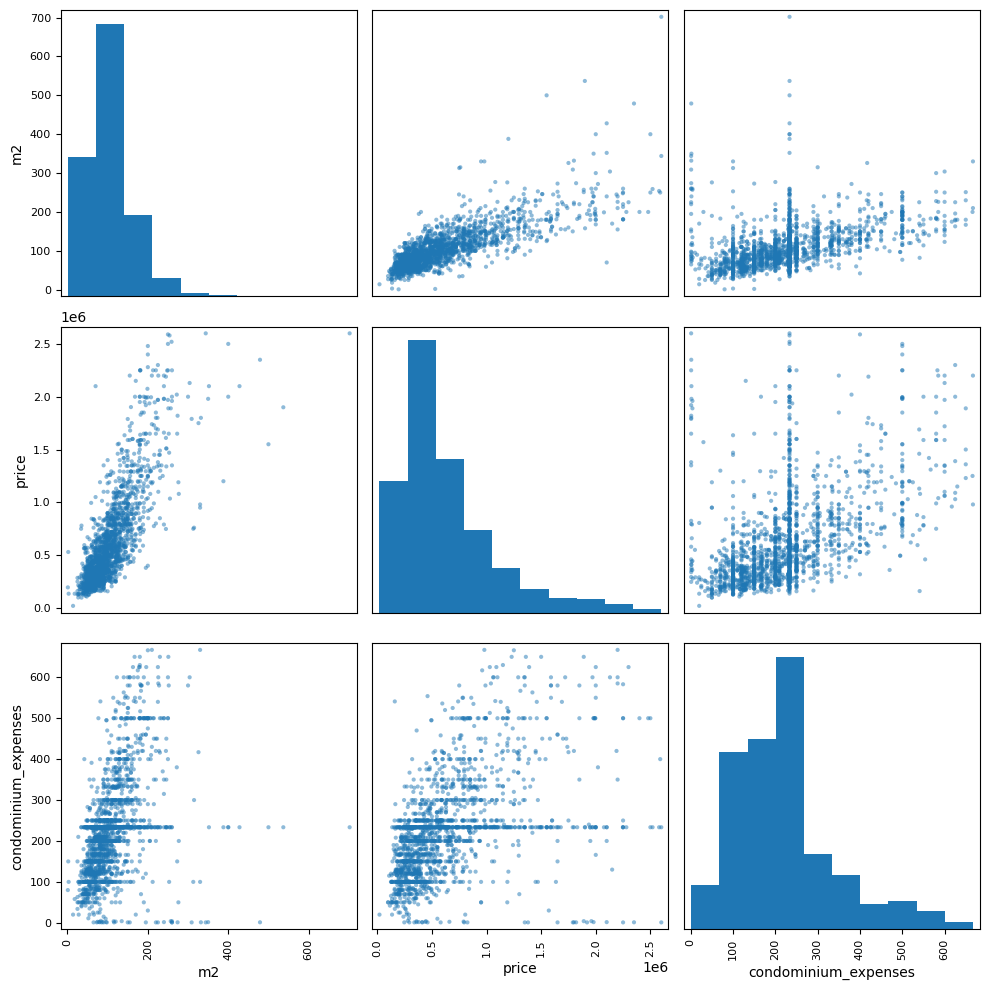

In [68]:
columns_to_plot = ['m2','price', 'condominium_expenses']

pd.plotting.scatter_matrix(df_cl[columns_to_plot], figsize=(10, 10))

plt.tight_layout()
plt.show()

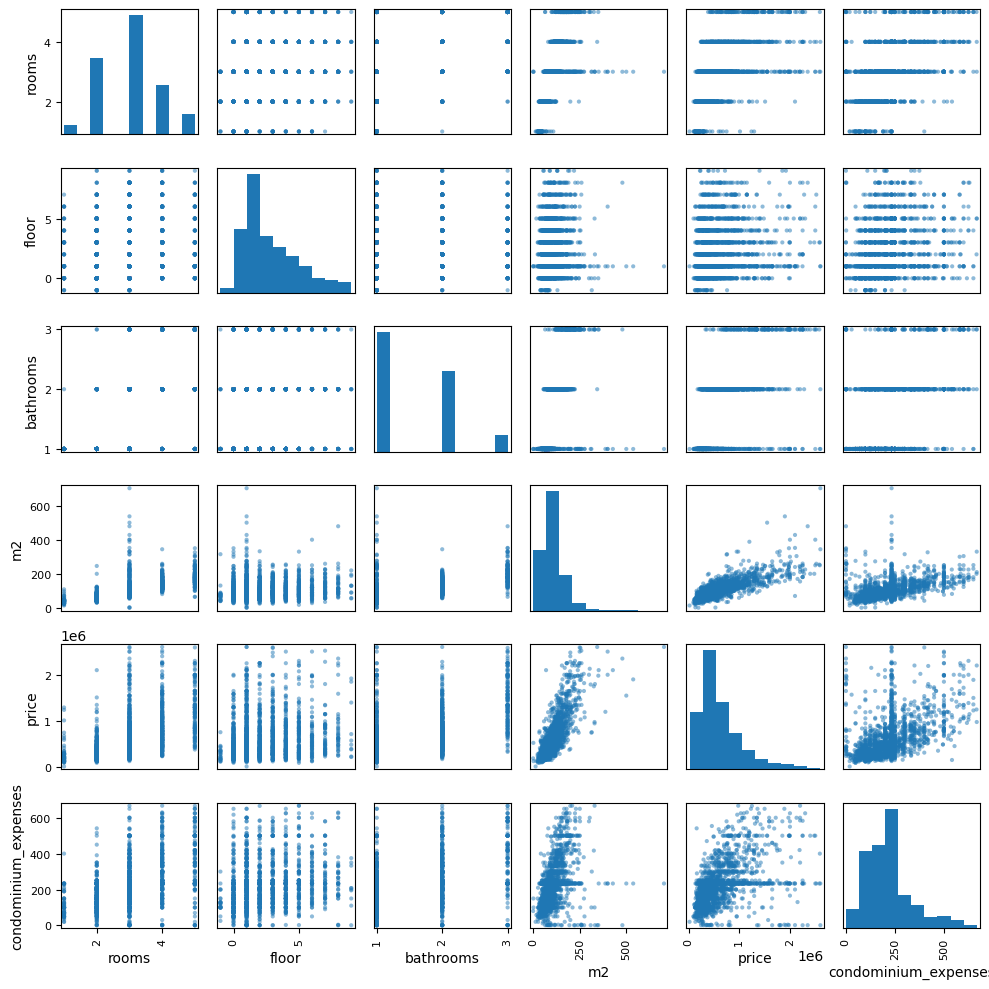

In [69]:
columns_to_plot = ['rooms','floor', 'bathrooms','m2','price', 'condominium_expenses']

pd.plotting.scatter_matrix(df_cl[columns_to_plot], figsize=(10, 10))

plt.tight_layout()
plt.show()

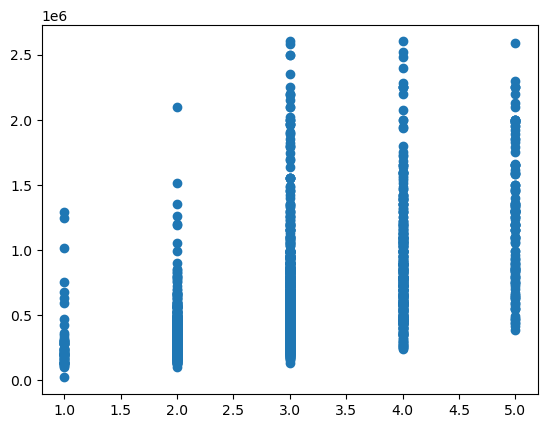

In [70]:
plt.scatter(df_cl.rooms,df_cl.price)

In [71]:
df_ncl = df_cl.select_dtypes(include='number')
df_ncl

index  rooms     m2  bathrooms  floor  condominium_expenses      price  \
0         0    3.0  140.0        2.0    4.0            535.000000   880000.0   
1         0    4.0  121.0        2.0    3.0            200.000000   649000.0   
2         0    2.0   55.0        1.0    4.0            133.000000   300000.0   
3         0    2.0   60.0        1.0    5.0            333.000000   250000.0   
4         0    4.0  220.0        3.0    4.0            233.520433  2250000.0   
...     ...    ...    ...        ...    ...                   ...        ...   
2124      0    2.0   51.0        1.0    2.0            100.000000   375000.0   
2126      0    3.0   90.0        2.0    0.0            183.000000   280000.0   
2127      0    3.0  130.0        2.0    0.0            200.000000   625000.0   
2128      0    2.0   51.0        1.0    1.0            233.520433   440000.0   
2129      0    2.0   72.0        1.0    1.0            250.000000   355000.0   

      year_of_build  energy_efficiency  
0       1900.000000             248.59  
1       1960.000000               3.51  
2       2006.000000             183.89  
3       1960.000000             138.80  
4       1970.000000               3.51  
...             ...                ...  
2124    1960.000000               3.51  
2126    1960.000000             174.00  
2127    1940.000000             175.00  
2128    1961.722252             193.44  
2129    1969.000000             284.99  

[1835 rows x 9 columns]

In [72]:

def detect_outliers_iqr(df_ncl, multiplier=1.5):
    """
    Detects outliers in a DataFrame using the IQR method.
    Returns a boolean mask indicating the rows containing outliers.
    """
    Q1 = df_ncl.quantile(0.25)
    Q3 = df_ncl.quantile(0.75)
    IQR = Q3 - Q1

    outlier_mask = np.logical_xor(df_ncl < Q1 - multiplier * IQR, df_ncl > Q3 + multiplier * IQR)

    return outlier_mask

# Assuming you have a DataFrame called 'df'
outlier_mask = detect_outliers_iqr(df_ncl)

# Print rows containing outliers
outliers = df_ncl[outlier_mask.any(axis=1)]
print(outliers)


      index  rooms     m2  bathrooms  floor  condominium_expenses      price  \
0         0    3.0  140.0        2.0    4.0            535.000000   880000.0   
1         0    4.0  121.0        2.0    3.0            200.000000   649000.0   
2         0    2.0   55.0        1.0    4.0            133.000000   300000.0   
4         0    4.0  220.0        3.0    4.0            233.520433  2250000.0   
6         0    4.0  150.0        2.0    0.0            300.000000   950000.0   
...     ...    ...    ...        ...    ...                   ...        ...   
2119      0    2.0   89.0        1.0    0.0            350.000000   519000.0   
2121      0    3.0   95.0        2.0    0.0            270.000000   545000.0   
2123      0    2.0   59.0        1.0    2.0            110.000000   398000.0   
2124      0    2.0   51.0        1.0    2.0            100.000000   375000.0   
2129      0    2.0   72.0        1.0    1.0            250.000000   355000.0   

      year_of_build  energy_efficiency 

In [73]:
columns_to_include = ['rooms','floor', 'bathrooms','m2','price', 'condominium_expenses']

df_boxplot = df_ncl[columns_to_include].copy()
df_boxplot

rooms  floor  bathrooms     m2      price  condominium_expenses
0       3.0    4.0        2.0  140.0   880000.0            535.000000
1       4.0    3.0        2.0  121.0   649000.0            200.000000
2       2.0    4.0        1.0   55.0   300000.0            133.000000
3       2.0    5.0        1.0   60.0   250000.0            333.000000
4       4.0    4.0        3.0  220.0  2250000.0            233.520433
...     ...    ...        ...    ...        ...                   ...
2124    2.0    2.0        1.0   51.0   375000.0            100.000000
2126    3.0    0.0        2.0   90.0   280000.0            183.000000
2127    3.0    0.0        2.0  130.0   625000.0            200.000000
2128    2.0    1.0        1.0   51.0   440000.0            233.520433
2129    2.0    1.0        1.0   72.0   355000.0            250.000000

[1835 rows x 6 columns]

<Axes: >

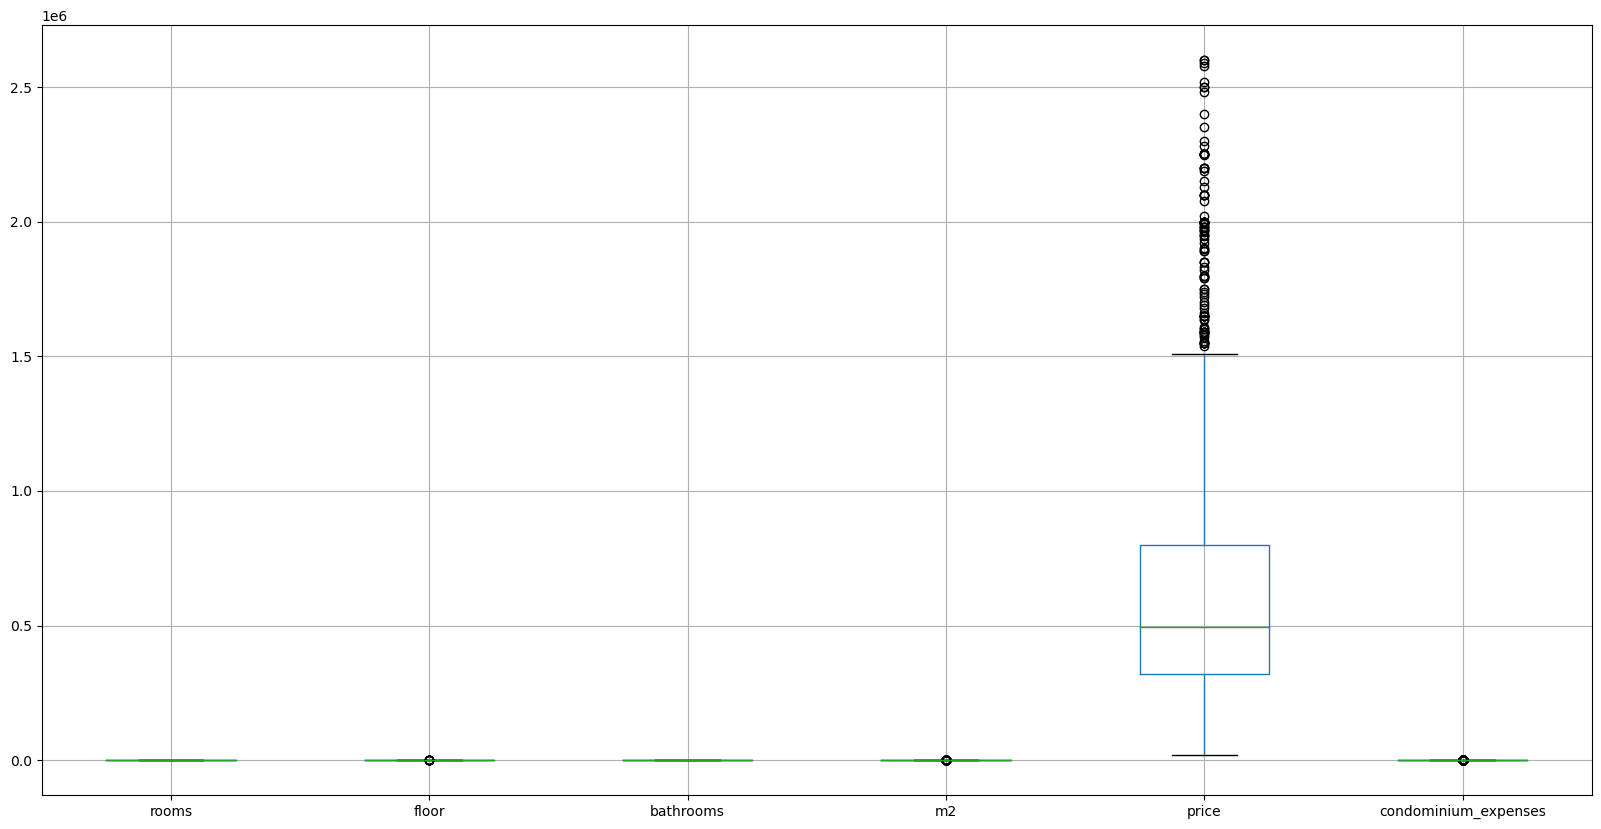

In [74]:

df_boxplot.boxplot(figsize = (20,10))

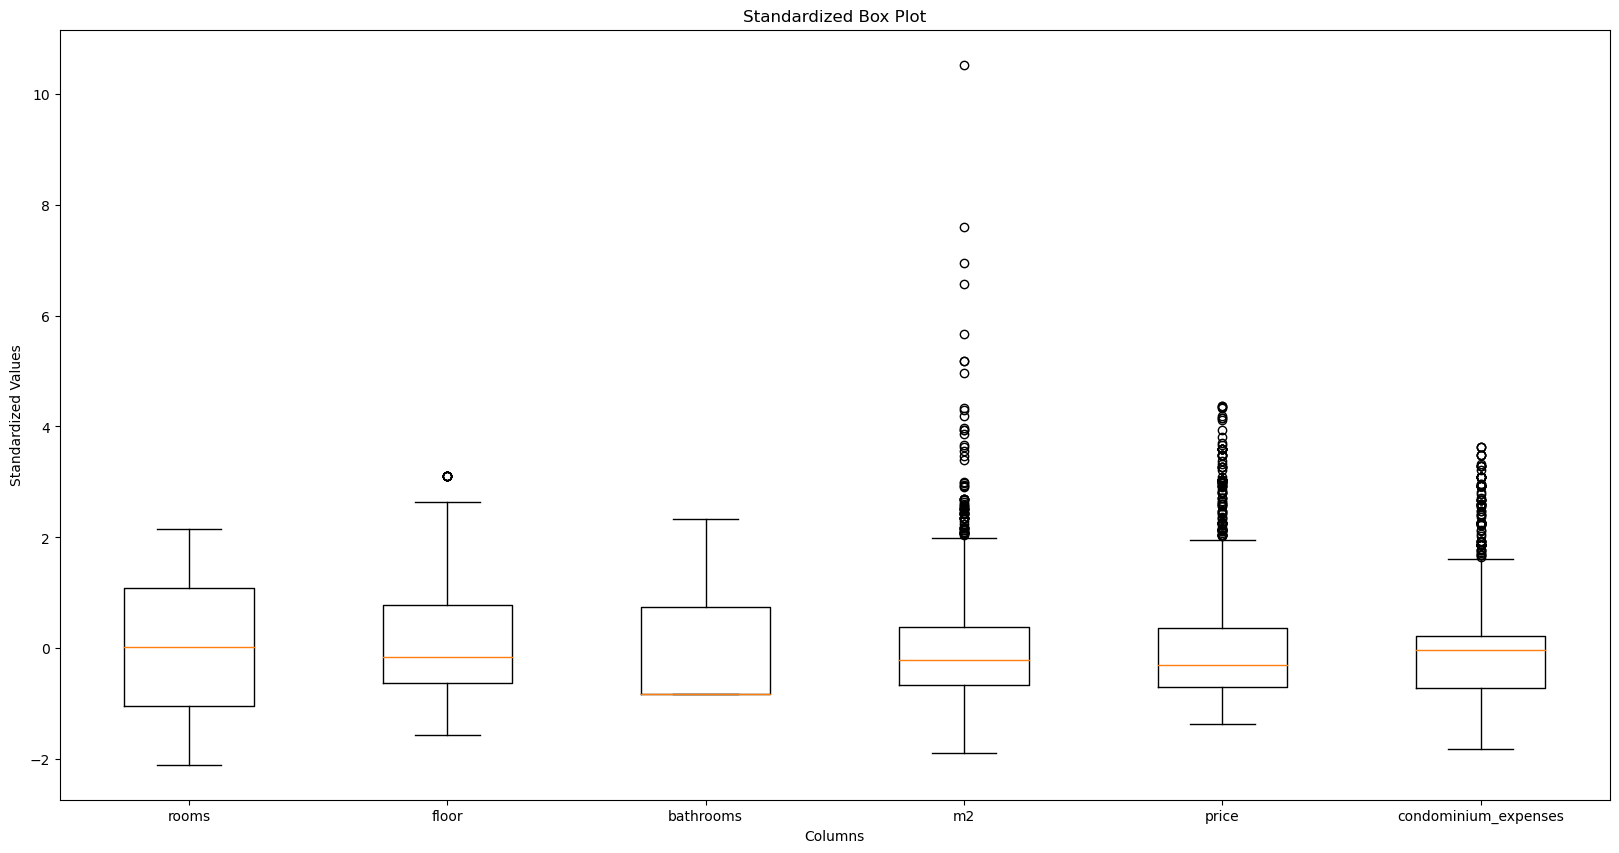

In [75]:

columns_to_plot = ['rooms','floor', 'bathrooms','m2','price', 'condominium_expenses']

# Standardizing the selected column(s) using z-scores
df_standardized = (df_ncl[columns_to_plot] - df_ncl[columns_to_plot].mean()) / df_ncl[columns_to_plot].std()

plt.figure(figsize=(20, 10))


plt.boxplot(df_standardized.values)


plt.title('Standardized Box Plot')
plt.xlabel('Columns')
plt.ylabel('Standardized Values')


plt.xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)

plt.show()


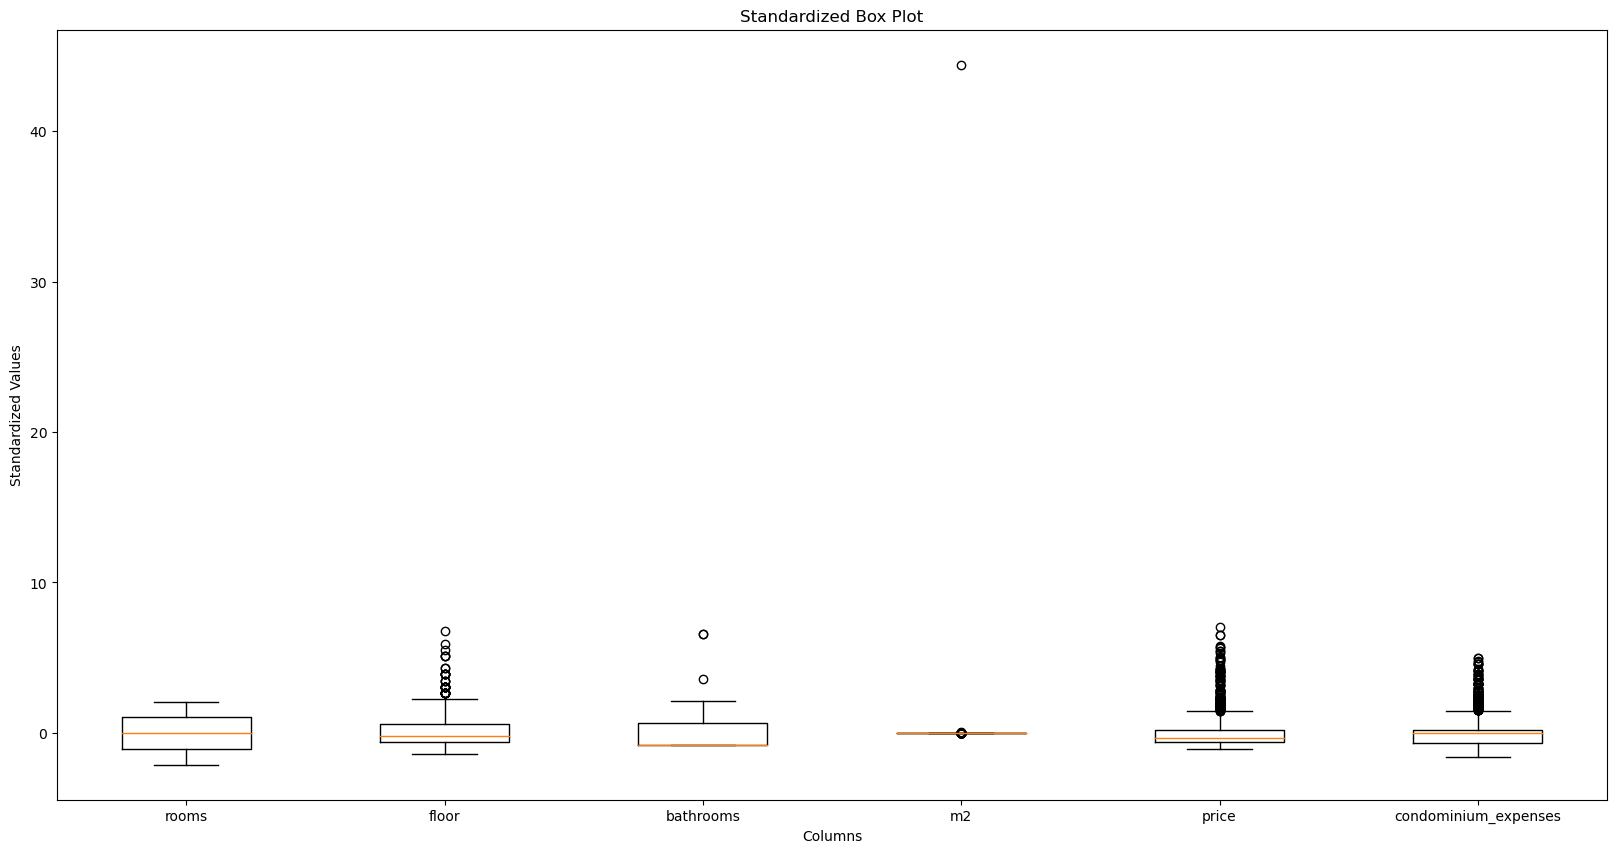

In [76]:
columns_to_plot = ['rooms','floor', 'bathrooms','m2','price', 'condominium_expenses']

# Standardizing the selected column(s) using z-scores
df_standardized = (df[columns_to_plot] - df[columns_to_plot].mean()) / df[columns_to_plot].std()

plt.figure(figsize=(20, 10))


plt.boxplot(df_standardized.values)


plt.title('Standardized Box Plot')
plt.xlabel('Columns')
plt.ylabel('Standardized Values')


plt.xticks(range(1, len(columns_to_plot) + 1), columns_to_plot)

plt.show()


In [77]:
g1 = [go.Box(y=df_ncl.rooms,name="rooms",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=df_ncl.m2,name="m2",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
g3 = [go.Box(y=df_ncl.bathrooms,name="bathrooms",marker=dict(color="rgba(9,80,58,12.2)"),hoverinfo="name+y")]
layout2 = go.Layout(title="Houses",yaxis=dict(range=[0,13])) 
fig2 = go.Figure(data=g1+g2+g3,layout=layout2)
iplot(fig2)

In [78]:
g1 = [go.Box(y=df_ncl.rooms,name="price",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=df_ncl.m2,name="price",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
g3 = [go.Box(y=df_ncl.bathrooms,name="condominium_expenses",marker=dict(color="rgba(9,80,58,12.2)"),hoverinfo="name+y")]
layout2 = go.Layout(title="Houses",yaxis=dict(range=[0,13])) 
fig2 = go.Figure(data=g1+g2+g3,layout=layout2)
iplot(fig2)

In [79]:
df_cl.columns

Index(['index', 'rooms', 'm2', 'bathrooms', 'floor', 'condominium_expenses',
       'date', 'contract', 'typology', 'total_floors', 'availability',
       'other_features', 'price', 'year_of_build', 'condition',
       'air_conditioning', 'energy_efficiency', 'city', 'neighborhood',
       'car_parking', 'energy_performance_building', 'energy_certification',
       'elevator', 'floor_level', 'heating_centralized', 'heating_radiator',
       'heating_gas', 'air_conditiong_centralized', 'air_conditioning_heat'],
      dtype='object')

In [80]:
fig1 = px.histogram(df_cl,x='condition',color='condition',template='plotly_dark')
fig1.show()
fig2 = px.histogram(df_cl,x='air_conditioning',color='air_conditioning',template='plotly_dark')
fig2.show()

In [81]:
fig3 = px.histogram(df_cl,x='energy_efficiency',color='energy_efficiency',template='plotly_dark')
fig3.show()
fig4 = px.histogram(df_cl,x='heating_centralized',color='heating_centralized',template='plotly_dark')
fig4.show()

In [82]:
fig5 = px.histogram(df_cl,x='car_parking',color='car_parking',template='plotly_dark')
fig5.show()
fig6 = px.histogram(df_cl,x='energy_performance_building',color='energy_performance_building',template='plotly_dark')
fig6.show()
fig7 = px.histogram(df_cl,x='energy_certification',color='energy_certification',template='plotly_dark')
fig7.show()

In [83]:
fig5 = px.histogram(df_cl,x='elevator',color='elevator',template='plotly_dark')
fig5.show()
fig6 = px.histogram(df_cl,x='floor_level',color='floor_level',template='plotly_dark')
fig6.show()
fig7 = px.histogram(df_cl,x='heating_centralized',color='heating_centralized',template='plotly_dark')
fig7.show()

In [84]:
fig5 = px.histogram(df_cl,x='heating_radiator',color='heating_radiator',template='plotly_dark')
fig5.show()
fig6 = px.histogram(df_cl,x='heating_gas',color='heating_gas',template='plotly_dark')
fig6.show()


In [85]:
fig7 = px.histogram(df_cl,x='air_conditiong_centralized',color='air_conditiong_centralized',template='plotly_dark')
fig7.show()
fig8 = px.histogram(df_cl,x='air_conditioning_heat',color='air_conditioning_heat',template='plotly_dark')
fig8.show()

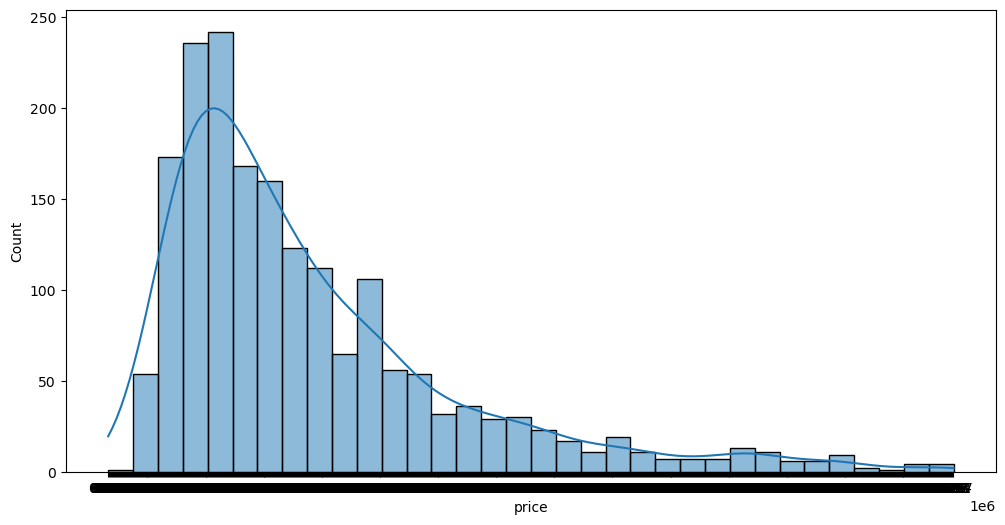

In [86]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cl['price'], kde=True)
plt.xticks(np.arange(df_ncl['price'].min(), df_cl['price'].max(), step=3000))
plt.show()

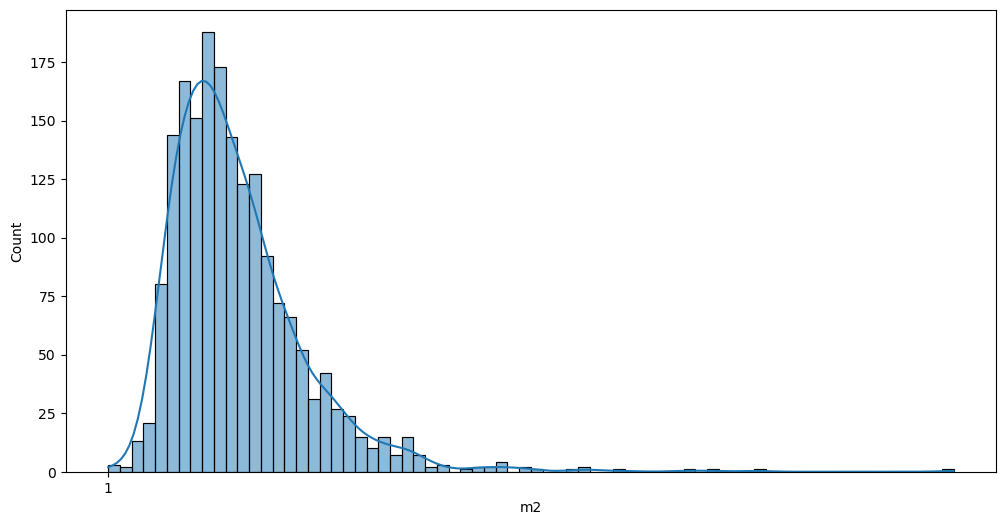

In [87]:
plt.figure(figsize=(12, 6))
sns.histplot(df_cl['m2'], kde=True)
plt.xticks(np.arange(df_cl['m2'].min(), df_cl['m2'].max(), step=3000))
plt.show()

In [88]:
df_cl = df_cl.drop('index', axis=1)

In [89]:
corr = df_ncl.corr()
plt.figure(figsize=(20, 9))

<Figure size 2000x900 with 0 Axes>

<Figure size 2000x900 with 0 Axes>

C:\Users\Amir Hbs\anaconda3\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning:

invalid value encountered in divide

C:\Users\Amir Hbs\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning:

invalid value encountered in divide



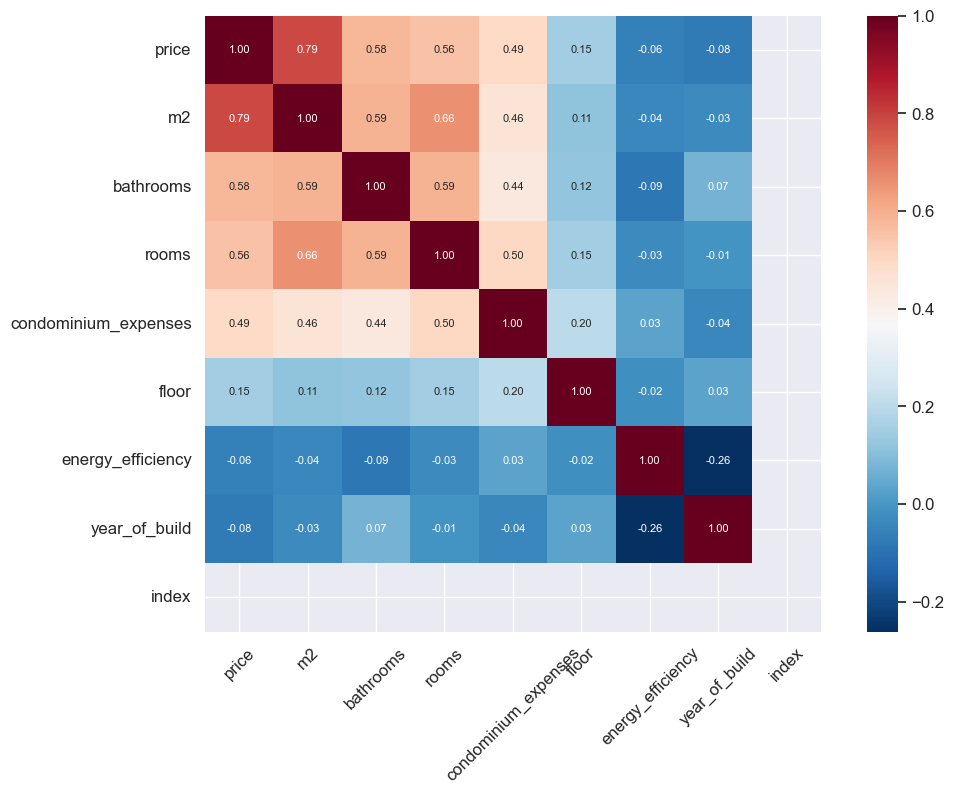

In [90]:
corr = df_ncl.corr()
plt.figure(figsize=(12, 8))
k = 9  # Number of variables for the heatmap
cols = corr.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_ncl[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 8},
    yticklabels=cols.values,
    xticklabels=cols.values,
    cmap='RdBu_r'  # Diverging color map
)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [91]:
df2 = df_ncl.copy()
y=df2.pop('price')
X=df2

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [93]:
regmodel=LinearRegression()
regmodel.fit(X_train,y_train)

LinearRegression()

In [94]:
y_pred=regmodel.predict(X_test)

In [95]:
print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred))

r2_score:  0.6310769990148921
mean_squared_error:  74118446471.89684
mean_absolute_error:  189387.89238237348


In [96]:
#polynomial Linear Regression

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [98]:
poly=PolynomialFeatures(degree=2)
X_train_quad=poly.fit_transform(X_train)
X_test_quad=poly.fit_transform(X_test)
polymodel=LinearRegression()

In [99]:
polymodel.fit(X_train_quad,y_train)

LinearRegression()

In [100]:
y_pred_quad=polymodel.predict(X_test_quad)
y_pred2=y_pred_quad

In [101]:
print(y_pred_quad.shape)
print(y_test.shape)

(367,)
(367,)


In [102]:
print('r2_score: ',metrics.r2_score(y_test,y_pred_quad))
print('explained_variance_score: ',metrics.explained_variance_score(y_test,y_pred_quad))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred_quad))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred_quad))

r2_score:  0.6835665832459252
explained_variance_score:  0.6840357185850776
mean_squared_error:  62389761209.10235
mean_absolute_error:  177923.37962945856


Text(0, 0.5, 'y_pred')

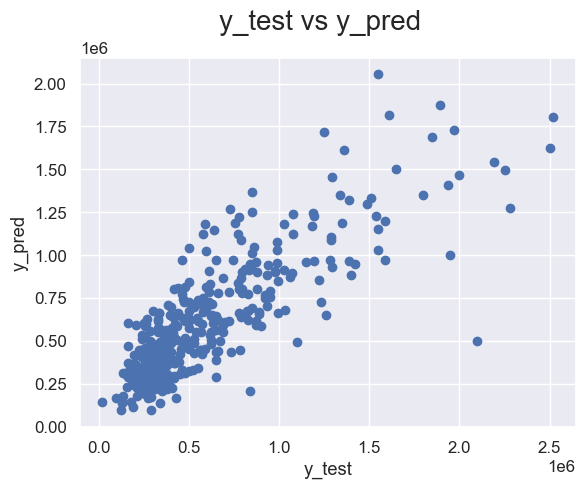

In [103]:
fig = plt.figure()
plt.scatter(y_test,y_pred_quad)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred') 

In [104]:
#Regression Decision Trees

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [106]:
regression_tree_houses = DecisionTreeRegressor()
regression_tree_houses.fit(X_train, y_train)

DecisionTreeRegressor()

In [107]:
y_pred_tree = regression_tree_houses.predict(X_test)

In [108]:
print('r2_score: ',metrics.r2_score(y_test,y_pred_tree))
print('explained_variance_score: ',metrics.explained_variance_score(y_test,y_pred_tree))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred_tree))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred_tree))

r2_score:  0.39554886892483665
explained_variance_score:  0.39556256686218605
mean_squared_error:  124368831188.6921
mean_absolute_error:  237386.7166212534


Text(0, 0.5, 'y_pred')

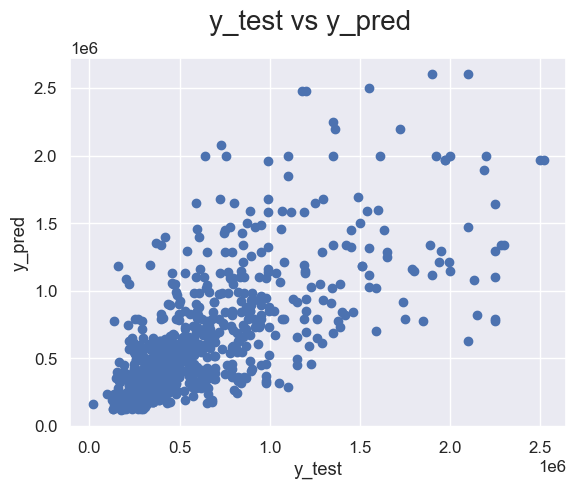

In [109]:
fig = plt.figure()
plt.scatter(y_test,y_pred_tree)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')